In [135]:
import numpy as np
import matplotlib.pyplot as plt

# Ex 1

In [2]:
def leverage_scores_svd(X):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    return np.sum(U**2, axis=1)

def high_lev_scores(lev_scores):
    thresh = np.quantile(lev_scores, 0.90)
    return lev_scores > thresh

def get_color(m):
    l = []
    for v in m:
        if v:
            l.append('r')
        else:
            l.append('b')
    return l
        
    

In [4]:
def plot_d2(X1, X2, X3, X4):
    lev1 = leverage_scores_svd(X1)
    lev2 = leverage_scores_svd(X2)
    lev3 = leverage_scores_svd(X3)
    lev4 = leverage_scores_svd(X4)
    
    lev_X1_map = high_lev_scores(lev1)
    lev_X2_map = high_lev_scores(lev2)
    lev_X3_map = high_lev_scores(lev3)
    lev_X4_map = high_lev_scores(lev4)
    
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs[0, 0].scatter(X1[:,0], X1[:,1], color=get_color(lev_X1_map))
    axs[0, 0].set_xlim(-15, 20)
    axs[0, 0].set_ylim(-15, 25)
    axs[0, 0].set_title("low var on x, low var on y")
    
    axs[0, 1].scatter(x_low_var, y_low_x_high_y, color=get_color(lev_X2_map))
    axs[0, 1].set_xlim(-15, 20)
    axs[0, 1].set_ylim(-15, 25)
    axs[0, 1].set_title("low var on x, high var on y")
    
    axs[1, 0].scatter(x_high_var, y_high_x_low_y, color=get_color(lev_X3_map))
    axs[1, 0].set_xlim(-15, 20)
    axs[1, 0].set_ylim(-15, 25)
    axs[1, 0].set_title("high var on x, low var on y")
    
    axs[1, 1].scatter(x_high_var, y_high_x_high_y, color=get_color(lev_X4_map))
    axs[1, 1].set_xlim(-15, 20)
    axs[1, 1].set_ylim(-15, 25)
    axs[1, 1].set_title("high var on x, high var on y")
    
    plt.show()




In [26]:
def plot_d3(X_all_low, X1, X2, X3, X_all_high):
    lev_all_low = leverage_scores_svd(X_all_low)
    lev1 = leverage_scores_svd(X1)
    lev2 = leverage_scores_svd(X2)
    lev3 = leverage_scores_svd(X3)
    lev_all_high = leverage_scores_svd(X_all_high)

    lev_X_all_low_map = high_lev_scores(lev_all_low)
    lev_X1_map = high_lev_scores(lev1)
    lev_X2_map = high_lev_scores(lev2)
    lev_X3_map = high_lev_scores(lev3)
    lev_X_all_high_map = high_lev_scores(lev_all_high)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X_all_low[:,0], X_all_low[:,1], X_all_low[:,2], color=get_color(lev_X_all_low_map))
    ax.set_xlim(-15, 20)
    ax.set_ylim(-15, 25)
    plt.title("low var on x1, low var on x2, low var on y")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X1[:,0], X1[:,1], X1[:,2], color=get_color(lev_X1_map))
    ax.set_xlim(-15, 20)
    ax.set_ylim(-15, 25)
    plt.title("high var on x1, low var on x2, low var on y")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X2[:,0], X2[:,1], X2[:,2], color=get_color(lev_X2_map))
    ax.set_xlim(-15, 20)
    ax.set_ylim(-15, 25)
    plt.title("low var on x1, high var on x2, low var on y")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X3[:,0], X3[:,1], X3[:,2], color=get_color(lev_X3_map))
    ax.set_xlim(-15, 20)
    ax.set_ylim(-15, 25)
    plt.title("low var on x1, low var on x2, high var on y")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X_all_high[:,0], X_all_high[:,1], X_all_high[:,2], color=get_color(lev_X_all_high_map))
    ax.set_xlim(-15, 20)
    ax.set_ylim(-15, 25)
    plt.title("high var on x1, high var on x2, high var on y")
    plt.show()
    

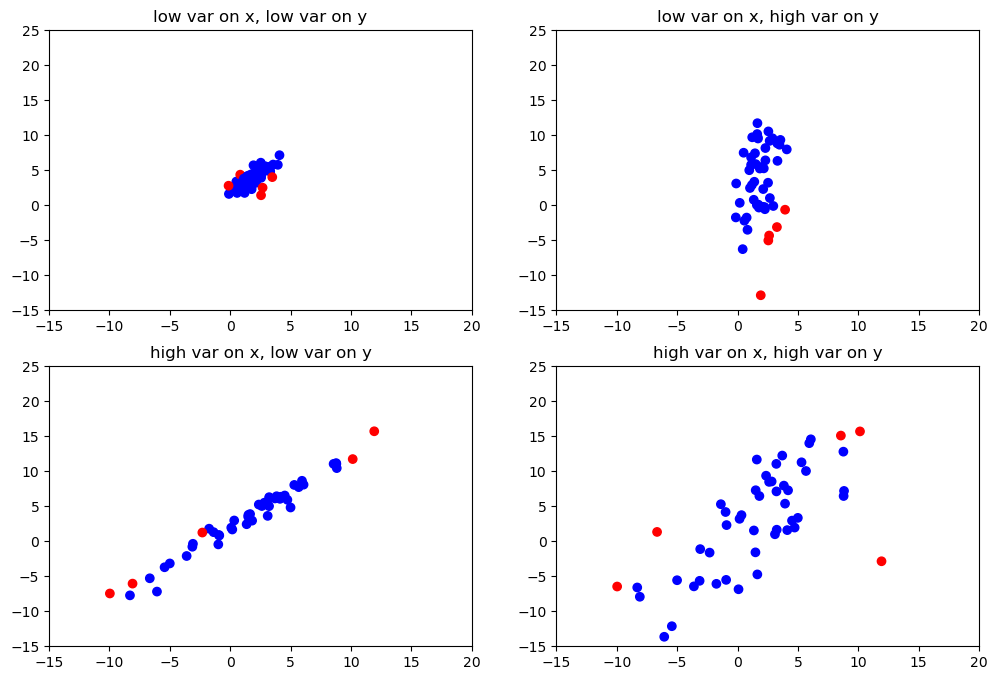

In [22]:
a = 1
b = 2
size = 50

x_low_var = np.random.normal(2, 1, size)
x_high_var = np.random.normal(2, 5, size)

epsilon_low = np.random.normal(0, 1, size)
epsilon_high = np.random.normal(0, 5, size)

# y = a * x + b + epsilon

y_low_x_low_y = a * x_low_var + b + epsilon_low
y_low_x_high_y = a * x_low_var + b + epsilon_high
y_high_x_low_y = a * x_high_var + b + epsilon_low
y_high_x_high_y = a * x_high_var + b + epsilon_high


X1 = np.column_stack((x_low_var, y_low_x_low_y))
X2 = np.column_stack((x_low_var, y_low_x_high_y))
X3 = np.column_stack((x_high_var, y_high_x_low_y))
X4 = np.column_stack((x_high_var, y_high_x_high_y))


plot_d2(X1, X2, X3, X4)

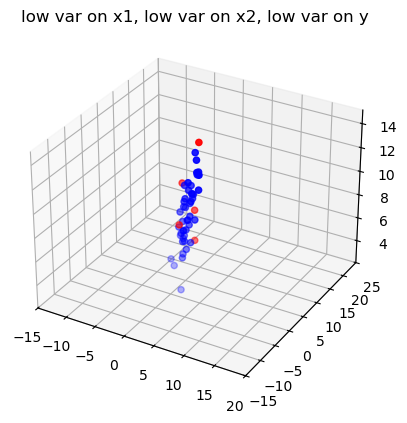

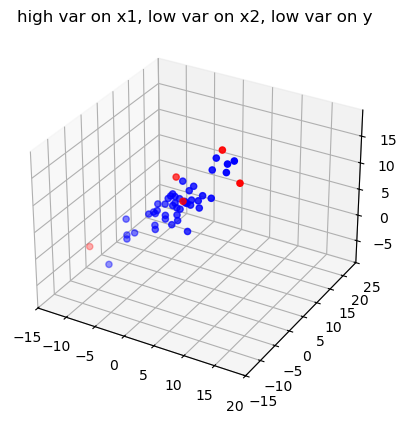

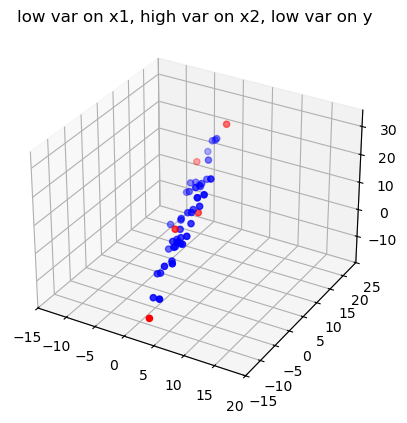

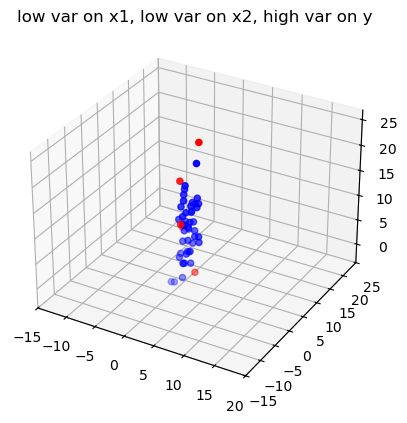

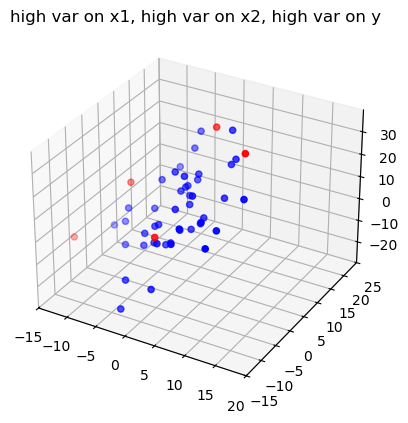

In [27]:
a = 1
b = 2
c = 3
size = 50

x1_low_var = np.random.normal(2, 1, size)
x1_high_var = np.random.normal(2, 5, size)

x2_low_var = np.random.normal(2, 1, size)
x2_high_var = np.random.normal(2, 5, size)

epsilon_low = np.random.normal(0, 1, size)
epsilon_high = np.random.normal(0, 5, size)

# y = a * x1 + b * x2 + c + epsilon

y_low_x1_low_x2_low_y = a * x1_low_var + b * x2_low_var + c + epsilon_low
y_high_x1_low_x2_low_y = a * x1_high_var + b * x2_low_var + c + epsilon_low
y_low_x1_high_x2_low_y = a * x1_low_var + b * x2_high_var + c + epsilon_low
y_low_x1_low_x2_high_y = a * x1_low_var + b * x2_low_var + c + epsilon_high
y_high_x1_high_x2_high_y = a * x1_high_var + b * x2_high_var + c + epsilon_high

X_all_low = np.column_stack((x1_low_var, x2_low_var, y_low_x1_low_x2_low_y))
X1 = np.column_stack((x1_high_var, x2_low_var, y_high_x1_low_x2_low_y))
X2 = np.column_stack((x1_low_var, x2_high_var, y_low_x1_high_x2_low_y))
X3 = np.column_stack((x1_low_var, x2_low_var, y_low_x1_low_x2_high_y))
X_all_high = np.column_stack((x1_high_var, x2_high_var, y_high_x1_high_x2_high_y))


plot_d3(X_all_low, X1, X2, X3, X_all_high)

# Ex 2

In [136]:
from pyod.utils.data import generate_data_clusters
from pyod.models.knn import KNN
from sklearn.metrics import balanced_accuracy_score

In [80]:
def get_color2(y):
    cols=[]
    for elem in y:
        if elem > 0:
            cols.append('r')
        else:
            cols.append('b')
    return cols
            

C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


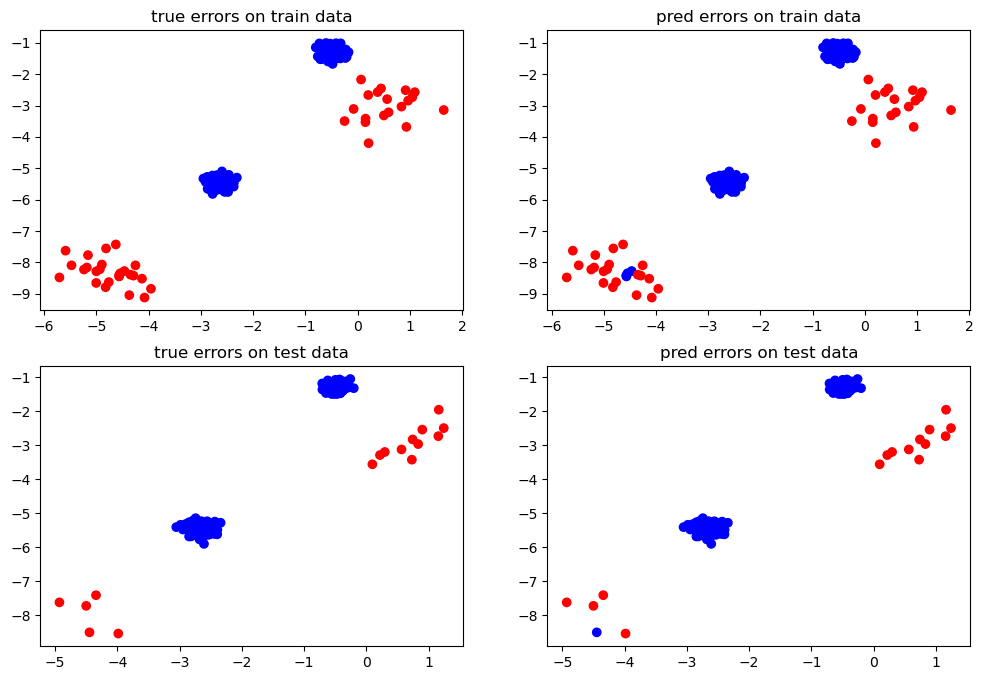

C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


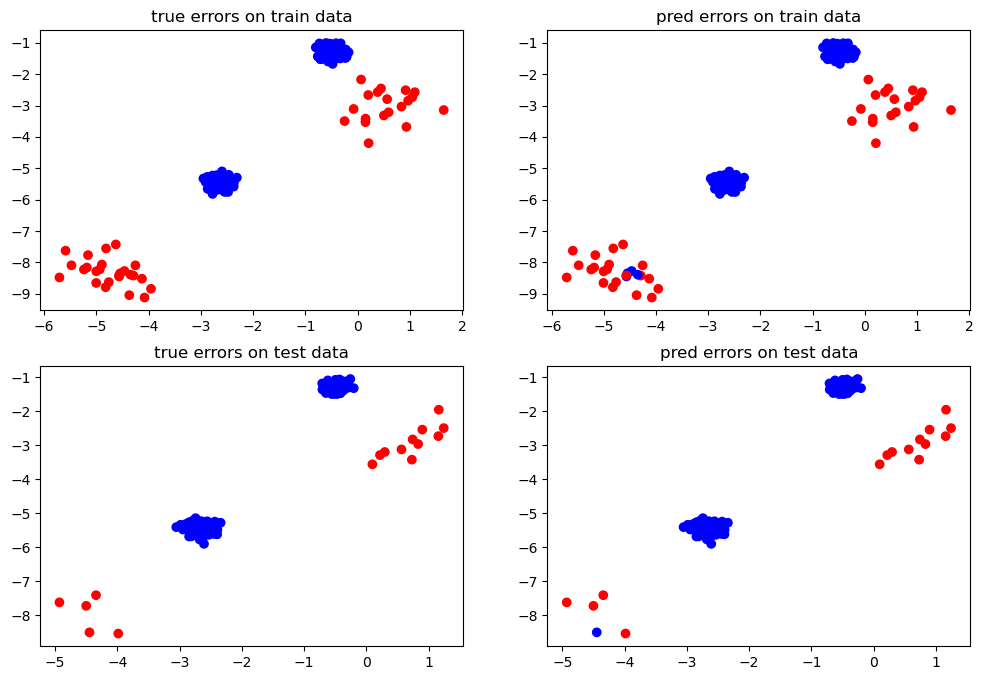

C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


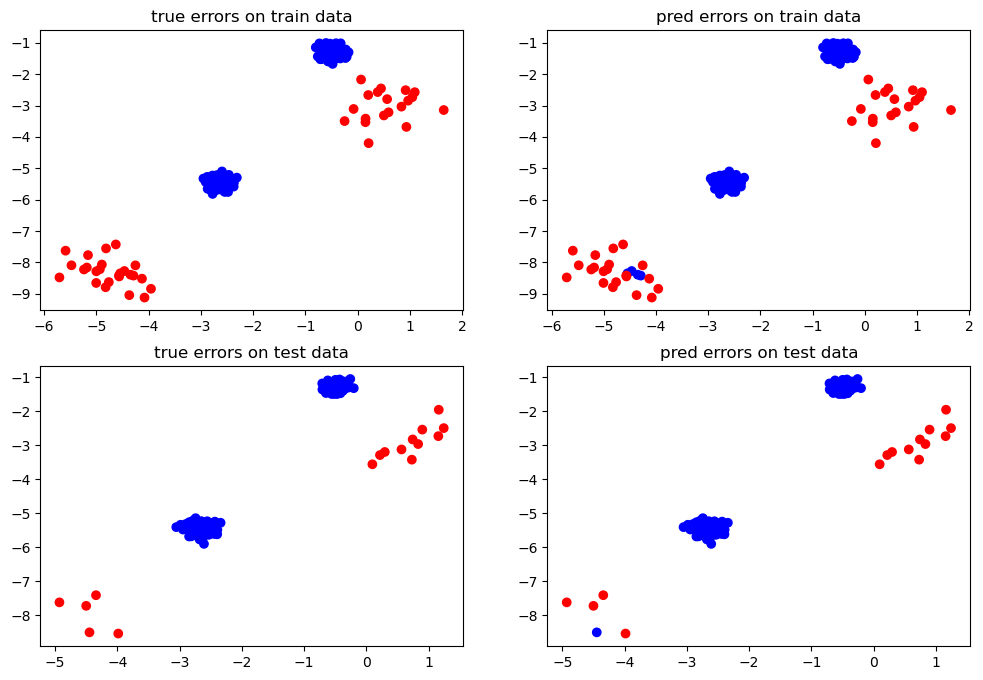

C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


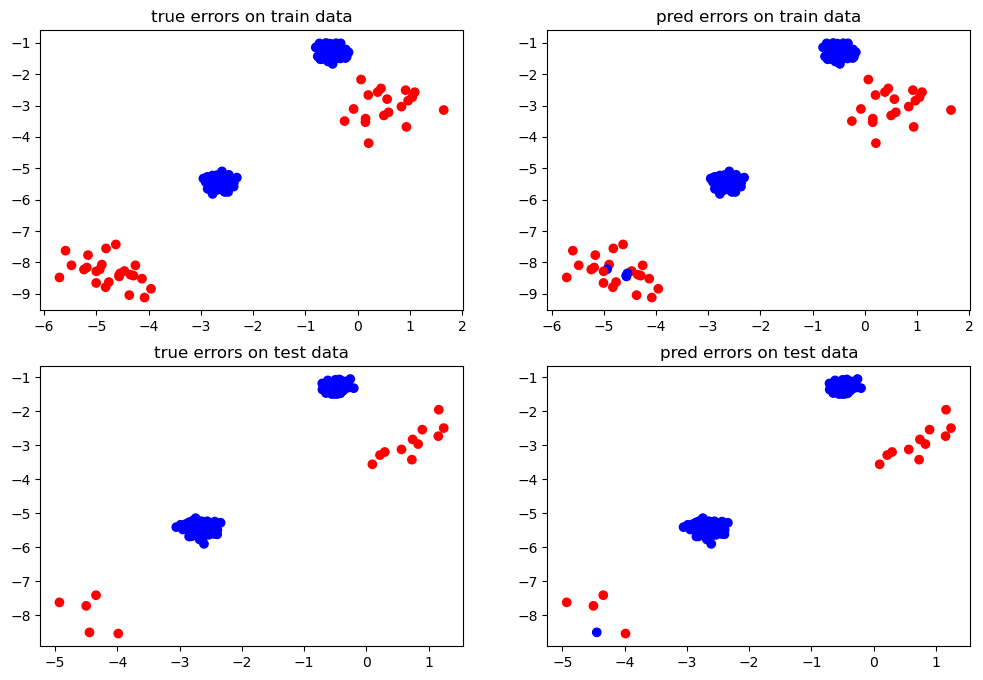

In [88]:
x_train, x_test, y_train, y_test = generate_data_clusters(n_train=400, n_test=200, n_clusters=2, contamination=0.1, )

n_neighbors_list = [3, 5, 7, 9]
balanced_accs = []

for n in n_neighbors_list:
    knn = KNN(contamination=0.1, n_neighbors=n)
    preds_train = knn.fit_predict(x_train)
    preds_test = knn.predict(x_test)

    balanced_accs.append((balanced_accuracy_score(y_train, preds_train), balanced_accuracy_score(y_test, preds_test)))
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    
    axs[0, 0].scatter(x_train[:,0], x_train[:, 1], c=get_color2(y_train))
    axs[0, 0].set_title('true errors on train data')
    
    axs[0, 1].scatter(x_train[:,0], x_train[:, 1], c=get_color2(preds_train))
    axs[0, 1].set_title('pred errors on train data')
    
    axs[1, 0].scatter(x_test[:,0], x_test[:, 1], color=get_color2(y_test))
    axs[1, 0].set_title('true errors on test data')
    
    axs[1, 1].scatter(x_test[:,0], x_test[:, 1], color=get_color2(preds_test))
    axs[1, 1].set_title('pred errors on test data')
    
    plt.show()


In [89]:
print(balanced_accs)

[(0.9545454545454546, 0.96875), (0.9545454545454546, 0.96875), (0.9545454545454546, 0.96875), (0.9545454545454546, 0.96875)]


# Ex 3

In [137]:
from sklearn.datasets import make_blobs
from pyod.models.lof import LOF

In [97]:
x1, y1 = make_blobs(n_samples=200, n_features=2, centers=[[-10, -10]], cluster_std=2)
x2, y2 = make_blobs(n_samples=100, n_features=2, centers=[[10, 10]], cluster_std=6)

C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
C:\Users\maria\anaconda3\envs\cuda\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWar

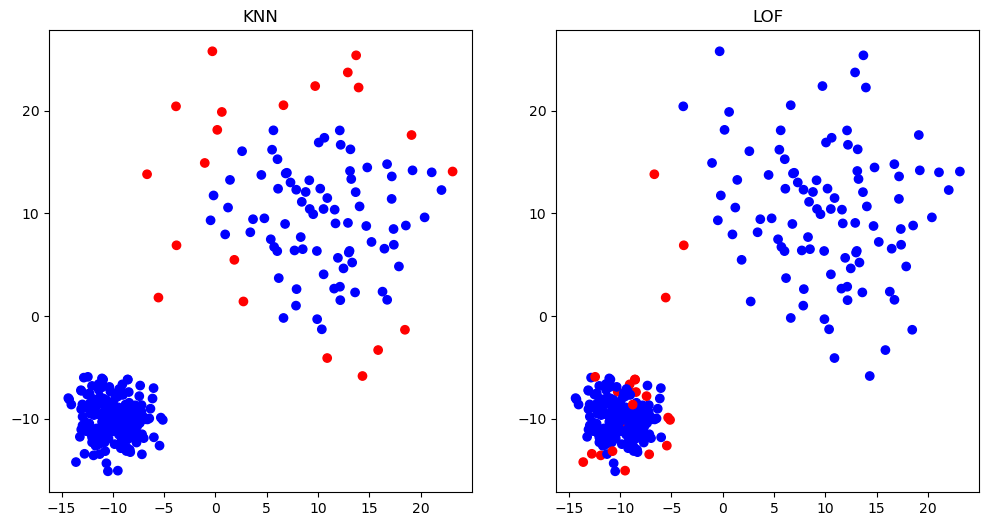

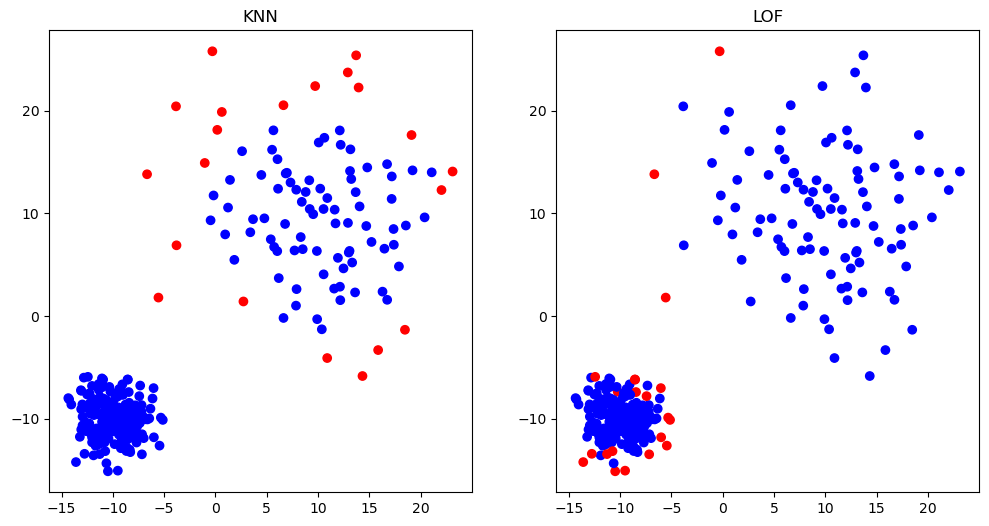

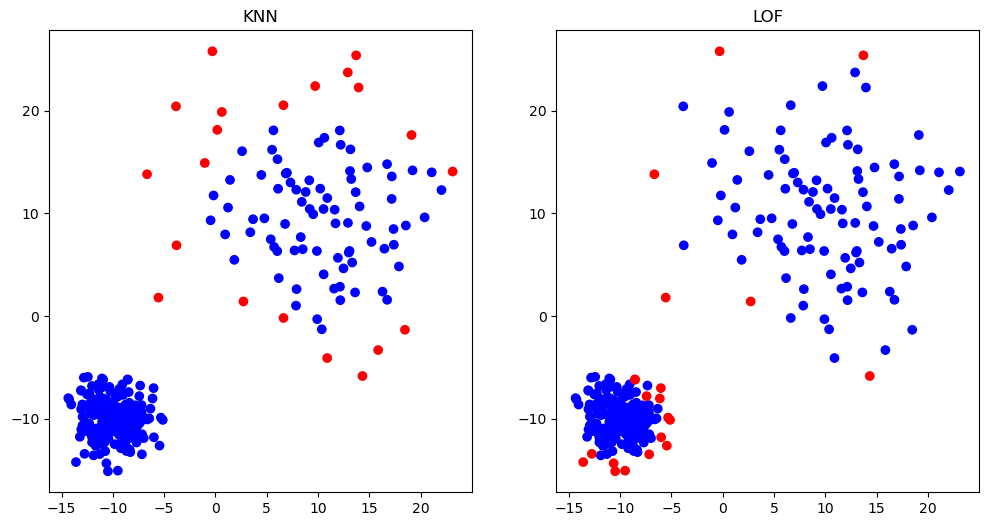

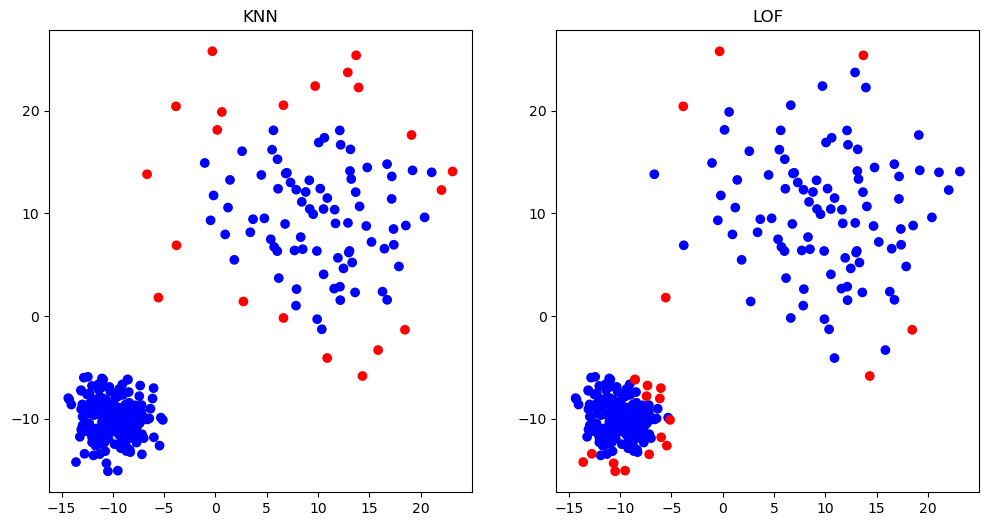

In [120]:
x = np.concatenate((x1, x2))
neib = [3, 5, 7, 9] 

for n in neib:

    knn = KNN(contamination=0.07, n_neighbors=n)
    lof = LOF(contamination=0.07, n_neighbors=n)
    
    knn_preds = knn.fit_predict(x)
    lof_preds = lof.fit_predict(x)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].scatter(x[:, 0], x[:, 1], color=['r' if x > 0 else "b" for x in knn_preds])
    axs[0].set_title("KNN")
    axs[1].scatter(x[:, 0], x[:, 1], color=['r' if x > 0 else "b" for x in lof_preds])
    axs[1].set_title("LOF")
    plt.plot()

# Ex 4

In [169]:
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pyod.utils.utility import standardizer
from pyod.models.combination import average, maximization

In [196]:
data = loadmat("cardio.mat")

X_train, X_test, y_train, y_test = train_test_split(data['X'], data['y'], test_size=0.1, random_state=42)

scaller = StandardScaler()
X_train = scaller.fit_transform(X_train)
X_test = scaller.transform(X_test)

train_scores = []
test_scores = []

for i in range(30, 130, 10):
    lof = LOF(contamination=0.1, n_neighbors=i)
    lof.fit(X_train)
    preds_train = lof.predict(X_train)
    preds_test = lof.predict(X_test)

    train_scores.append(lof.decision_scores_)
    test_scores.append(lof.decision_function(X_test))
    
    print(f"Model with n_neighbors = {i}")
    print("Train balanced acc:", balanced_accuracy_score(preds_train, y_train))
    print("Test balanced acc:", balanced_accuracy_score(preds_test, y_test))
    print()


train_scores, test_scores = standardizer(np.array(train_scores).T, np.array(test_scores).T)


final_train_scores_average = average(train_scores)
final_test_scores_average = average(test_scores)

final_train_scores_maxi = maximization(train_scores)
final_test_scores_maxi = maximization(test_scores)



Model with n_neighbors = 30
Train balanced acc: 0.5461536638543938
Test balanced acc: 0.5467455621301776

Model with n_neighbors = 40
Train balanced acc: 0.5436142496001651
Test balanced acc: 0.5542016806722689

Model with n_neighbors = 50
Train balanced acc: 0.5459615237479916
Test balanced acc: 0.5467455621301776

Model with n_neighbors = 60
Train balanced acc: 0.5471547232110612
Test balanced acc: 0.5401785714285714

Model with n_neighbors = 70
Train balanced acc: 0.5606356602402428
Test balanced acc: 0.5542016806722689

Model with n_neighbors = 80
Train balanced acc: 0.5683188015682603
Test balanced acc: 0.5467455621301776

Model with n_neighbors = 90
Train balanced acc: 0.5839527557753047
Test balanced acc: 0.5830374753451677

Model with n_neighbors = 100
Train balanced acc: 0.5992973759226905
Test balanced acc: 0.6455240665766981

Model with n_neighbors = 110
Train balanced acc: 0.6170378106343437
Test balanced acc: 0.655621301775148

Model with n_neighbors = 120
Train balanced a

In [197]:
train_avg_thresh = np.quantile(final_train_scores_average, q=0.1)
test_avg_thresh = np.quantile(final_test_scores_average, q=0.1)

train_max_thresh = np.quantile(final_train_scores_maxi, q=0.1)
test_max_thresh = np.quantile(final_test_scores_maxi, q=0.1)

In [198]:
train_avg_preds = np.array([1 if x >= train_avg_thresh else 0 for x in final_train_scores_average])
train_avg_acc = balanced_accuracy_score(train_avg_preds, y_train)

test_avg_preds = np.array([1 if x >= test_avg_thresh else 0 for x in final_test_scores_average])
test_avg_acc = balanced_accuracy_score(test_avg_preds, y_test)


train_max_preds = np.array([1 if x >= train_max_thresh else 0 for x in final_train_scores_maxi])
train_max_acc = balanced_accuracy_score(train_max_preds, y_train)

test_max_preds = np.array([1 if x >= test_max_thresh else 0 for x in final_test_scores_maxi])
test_max_acc = balanced_accuracy_score(test_max_preds, y_test)

In [199]:
print(train_avg_acc)
print(test_avg_acc)
print()
print(train_max_acc)
print(test_max_acc)

0.5522941970310391
0.5636363636363636

0.5522941970310391
0.5636363636363636
